# Naive Bayes Transaction Classification

The Naive Bayes Classifier is a probabilistic supervised learning method. The probability of a transaction $T$ beeing in class $c$ is given as  

$$ P(c|T) \propto P(c) \prod_{1\leq k \leq n_{T}} P(t_{k}|c) \tag{1}$$

where $P(t_{k}|c)$ is the conditional probability of term $t_{k}$ occurring in a transaction $T$ of class/category $c$. 
For example: 

$(t_{1},t_{2},...,t_{n})$ $=$ (89990201.0, 28.07.2016, ..., EUR)

$P(c)$ is the prior probability of a transaction occurring in class $c$.  


Our goal is to find the class $c$, which at the best represents the given transaction $T$. Therefore we compute the <i> _maximum a posteriori_ </i>:

$$\DeclareMathOperator*{\argmax}{arg\,max} c_{map} = \argmax_{c\in \textbf{C} } P(c|T) = \argmax_{c\in \textbf{C} } P(c) \prod_{1\leq k \leq n_{T}} P(t_{k}|c) \tag{2}$$  

The values for $P(c)$ and $P(t_{k}|c)$ we will estimate out from the given training data. 

In an extreme case this can result in a floating point underflow, since we are __multiplying__ a large number of conditional probabilities.   
To avoid this, relating to mathematics there is a very common way to transform the above equation $(2)$ to a sum. In fact we use the logarithm.  
Therefore the actual equation we will use in our further numerical computations looks like this:

$$\DeclareMathOperator*{\argmax}{arg\,max} c_{map} =\argmax_{c\in \textbf{C} }\ [\ \log{P(c)} \ + \sum_{1\leq k \leq n_{T}} \log{P(t_{k}|c)} \tag{3} \ ]$$  

For a better understanding, the prior probability $P(c)$ in our case represents the relative frequency of $c$ occurring in the given training set.  
Where $P(t_{k}|c)$ as a conditional probability represents a weight, which tells whether $t_{k}$ is a good indicator for a class $c$._(Manning et al. 2010)_

## Estimation of the parameter $P(c)$ and $P(t_{k}|c)$ with _scikit-learn_

Scikit-Learn provides us a bunch of Naive Bayes classifier types:
1. _Gaussian_ Naive Bayes  
2. _Multinomial_ Naive Bayes  
3. _Complement_ Naive Bayes  
4. _Bernoulli_ Naive Bayes 
  
In this Article we will discuss all the Naive Bayes classifier types except of the Gaussian Naive Bayes classifier. Since we are dealing with text classification our data is discrete, where as the Gaussian represents a continuous distribution. Therefore to use Gaussian in our case we have to find a way to represent a word throughout a Gaussian distribution as a continuous value. There are maybe some ways to transform a word into a vector with continuous values, but in this case we will not take into consideration such kind of transformations and therefore ignore this type of classifier for the evaluation.  


### MultinomialNB (Naive Bayes algorithm for multinomially distributed data)

We will ignore $P(c)$, since the estimation of the prior probability is the same as in all Naive Bayes classifiers.
  
$$ P(c) = \frac{N_{c}}{N} $$
  
  whereas in our case $N_{c}$ is the Number of transactions in class $c$ and $N$ the number of all transactions of the given training data.

In the MultinomialNB the conditional probability $P(t|c)$ is estimated as the relative frequency of the term $t$ in transactions occurring in class $c$:

  $$ P(t|c) = \frac{N_{t,c}}{\sum_{t \in T}N_{t,c}}$$
  
whereas $N_{t,c}$ is the number of occurrences of $t$ in the training set belonging to class $c$ and $\sum_{t \in T}N_{c,t}$ the total count terms $t \in T$ in class $c$._(Manning et al. 2010)(Pedregosa et al. 2011)_

### BernoulliNB 

An alternative to the MultinomialNB is the Bernoulli model. The estimation of the parameter $P(t|c)$ in the Bernoulli model is based on a binary independence model. It means, instead of estimating the relative frequency, it generates an binary indicator for each term $t$, either $1$ if the term is present in the transaction and $0$ otherwise. Thus we have:

$$P(t|c) = \frac{\sum_{N_{c}}t_{c}}{N_{c}}$$

where $N_{c}$ is the number of transactions of the class $c$ in the training set and $t_{c} \in \{0,1\}$._(Manning et al. 2010)(Pedregosa et al. 2011)_

### ComplementNB (CNB)

The MNB unfortunately has some systematic problems, as one of them is selecting poor weights for the decision boundary, when it comes to imbalanced data set. It means that classes with fewer training samples are weighted less than those with a higher number of training samples. This is where CNB comes in. CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets. And as you will see, CNB will be of importance in our case._(Pedregosa et al. 2011)(Rennie et al. 2003)_

#### Estimation of the parameters in python

At first we have to extract our given textdata from the _.csv_ file:  

In [117]:
import numpy as np

attributes = np.array(["ID","Auftragskonto","Buchungstag","Valutadatum","Buchungstext","Verwendungszweck","Beguenstigter/Zahlungspflichtiger","Kontonummer","BLZ","Betrag","Waehrung","label"])
len(attributes)

12

In [118]:
# Load CSV (using python)
import csv

filename = 'Exercise1_TransactionClassification_DataSet_w_Header.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=';', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype("str")

In [119]:
data.shape

(209, 12)

#### Clean up data:

In [120]:
import string
import numpy
import csv

x=[]
i=0

#convert array from tupels of string into an array with one stringelement 
for i in range(len(data[:])):
    a = " ".join(data[i,:-1])
    x.append(a)

cleandata = np.array(x)


table = str.maketrans('', '', string.punctuation)

#splits the stringelement into words, deletes null strings, removes punctuations and sets all words lower.  
Clean = []
for x, value in numpy.ndenumerate(cleandata):
    
    c = numpy.array(list(filter(None,[w.translate(table) for w in cleandata[x].split()])),'<U120')
    Clean.append(" ".join(c).lower())
    
Cleandata = np.array(Clean)

print(Cleandata.shape) 
print(Cleandata) 

(209,)
['0 899902010 28072016 28072016 lohn gehalt gehalt adorsys gmbh co kg endtoendref notprovided kundenreferenz nsct1603300013660000000000000000001 gutschrift adorsys gmbh co kg 7807800780 25190001 200000 eur'
 '1 899902010 27072016 27072016 miete byladem1sbt de12773501123456789889 miete beuthener str 25 endtoendref notprovided dauerauftrag dauerauftrag georg tasche de31251900019123456780 vohade2hxxx 67000 eur'
 '2 899902010 21072016 21072016 bargeld 21071634uhr nuernberg all eur 7000 gebeur 000 einzahlungauszahlung ga nr55508568 blz76010085 9 bargeld 9999900780 25190001 7000 eur'
 '3 899902010 20072016 20072016 lebensmittel getraenke 2831 edeka neubauer nuernbnuernb 20160720t175445 kfn 9 vj 1612 lastschrift kartenzahlung 9736000780 25190001 7321 eur'
 '4 899902010 18072016 18072016 spontanausgabe amazon neue playstation 9988776655 25125100 363 eur'
 '5 899902010 15072016 15072016 mieteinnahmen mietzuschuss endtoendref notprovided kundenreferenz nsct1603080001510000000000000000006 

#### Train/Test-Split of the data:

There are two main issues when it comes to data-splitting in machine learning in fact __overfitting__ and __underfitting__. In other words by splitting the data "correctly" we want to avoid to fit very well or very closely to the training data which leads to a not very generalized model (__overfitting__) and therefore can’t make any meaningful inferences on other data. Otherwise you also don't want to underfit your model. As a note, except of the train/test-split method there are also other important factors that have an influence on __over- and underfitting__. In fact Feature-selection is also a big topic regarding __over- and underfitting__, which we will discuss in the further topics.

There are a bunch of methods how to split your data. In python we use  the `train_test_split`  method from the _Scikit-Learn_ library. In this Article we will discuss the very common classical way of splitting the data into a training set and a test set, usually 80/20 or 70/30 (training data/ test data).

##### 1. Train/Test-Split - 70/30:

In [121]:
from sklearn.model_selection import train_test_split
X, y = data[:,:-1], data[:,-1]
row_len, col_len = X.shape
row_len_clean = Cleandata.shape

Xt_clean, Xe_clean, yt_clean, ye_clean = train_test_split(Cleandata, y, test_size=0.25)

In [122]:
row_lenT_clean = Xt_clean.shape
print("Training Data:")
print(row_lenT_clean)
print(Xt_clean)

Training Data:
(156,)
['179 01062016 01062016 bargeld 01061634uhr nuernberg all eur 7000 gebeur 000 einzahlungauszahlung ga nr55508568 blz76010085 9 bargeld 9999900780 25190001 7000 eur'
 '90 899902100 07032016 07032016 lastschrift einzugsermã¤chtigung intersport rentreit im winklde 2 0160305t095727folgenr001 verf alld2020 12 intersport rent de24710520500000355073 byladem1tst 18 eur'
 '74 899902100 23032016 23032016 lastschrift einzugsermã¤chtigung visa621850218002796620 53500eur00000000000 2103 000 10355999 amazon de marketplace 922904916 76030080 535 eur'
 '151 899902100 25012016 25012016 lastschrift einzugsermã¤chtigung humanicnuernberde 20160123t13 2317 folgenr001 verfalld202012 humanic de35760100850024668858 pbnkdeff 3995 eur'
 '145 899902100 01022016 01022016 lastschrift einzugsermã¤chtigung elv56006916 2801 1912 me1rewe sa gt danke 46400517 rewe nuernberg aeu de56500101111932685105 essede5f 2264 eur'
 '112 899902100 24022016 24022016 lastschrift einzugsermã¤chtigung visa62185021

In [123]:
row_lenE_clean = Xe_clean.shape
print("Test Data:")
print(row_lenE_clean)
print(Xe_clean)

Test Data:
(53,)
['172 15062016 15062016 mieteinnahmen mietzuschuss endtoendref notprovided kundenreferenz nsct1603080001510000000000000000006 gutschrift isabel anna de31251900019736000780 vohade2hxxx 20000 eur'
 '206 28012016 28012016 lohn gehalt gehalt adorsys gmbh co kg endtoendref notprovided kundenreferenz nsct1603300013660000000000000000001 gutschrift adorsys gmbh co kg 7807800780 25190001 200000 eur'
 '173 10062016 10062016 lebensmittel getraenke 2831 edeka neubauer nuernbnuernb 20160510t175445 kfn 9 vj 1612 lastschrift kartenzahlung 9736000780 25190001 2599 eur'
 '58 899902100 06042016 06042016 lastschrift einzugsermã¤chtigung elv56006915 0404 1535 me1rewe sa gt danke 46400517 rewe nuernberg aeu de56500101111932685105 essede5f 1299 eur'
 '51 899902100 12042016 12042016 lastschrift einzugsermã¤chtigung pulsnitz gmb de40750500000030909999 byladem1rgb 50 eur'
 '153 899902100 25012016 25012016 euroãœberweisung euroãœberweisung anna fein de51760300800843688500 csdbde71xxx 50 eur'
 '

Keep in mind ! Train/test split does have its dangers. What if the split we make isn't random ? What if one subset of our data for example has only people from a certain state, employees with a certain income level but not other income levels, only women or only people at a certain age or in our case transactions of one type ? This will result in overfitting, even though we are trying to avoid it! This is where cross validation comes in, which we will not consider in this evaluations. However it is important to be mentioned and cross validation usually should be preferred in machine learning in regard to get trustfull results._(Bronshtein 2017)_

##### Class occurence in given data set:

In the figure below, we can extract that our data-set isn't very good balanced. Therefore as mentioned in the previous section _CNB_ the CNB classifier will probably be the better choice compared to MNB.  

['finance' 'income' 'leisure' 'living' 'private' 'standardOfLiving']
[33 17 65 26 21 47]


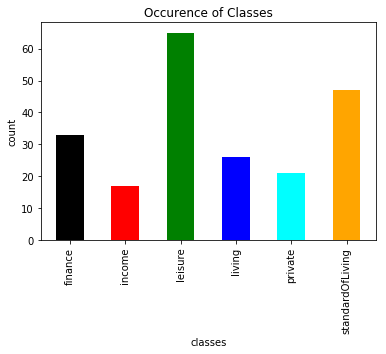

In [124]:
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

##ploting occurence of the label data !
#encoding labels
le = preprocessing.LabelEncoder()
le.fit(y)
classes = le.transform(y)
list_of_classes = np.array(list(le.classes_))

#classes, corresponding count of a class
unique, counts = np.unique(classes, return_counts=True)
occur_classes = dict(zip(unique, counts))

#list of class names
x = list_of_classes
print(x)

#list of total count of each class name in the data set
y = []
i=0
for i in range(len(occur_classes)):
    y.append(occur_classes[i])
y=np.array(y)    
print(y)

#plot 
width=(1, 1, 1, 1, 1, 1)
position = np.arange(1,len(x)*2,2)
fig, ax = plt.subplots()
plt.bar(position, y, width, color=['black', 'red', 'green', 'blue', 'cyan','orange'])
plt.xlabel('classes')
plt.ylabel('count')
plt.title('Occurence of Classes')
plt.xticks(position, x, rotation='vertical')
plt.show()

#### Feature-Selection

As mentioned in the previous topic a very important issue in machine learning is the feature-selection. First of all there is the so called curse of dimensionality. So we always should try to decrease our dimensionality as much as possible. Why ?. The bigger your feature dimensions are the much more data you need in case to avoid overfitting. Otherwise the bigger your feature dimensions, the bigger is the probability of fitting the noise in the training data since not all features really contain meaningful information for further predictions. But also be careful not to use less features than needed and accidentally underfit your model because of lack of informations. Summerized, this means we want to get rid of as many features as possible, but without losing any significant information of our model. There exist several methods of feature-selection. The probably most common methods are feature selection regarding __Mutual Information__ and $\chi^{2}$ __feature selection__. Despite the differences between the two methods, the classification accuracy of feature sets selected with $\chi^{2}$ and MI does not seem to differ systematically. In most text classiﬁcation problems, there are a few strong indicators and many weak indicators. As long as all strong indicators and a large number of weak indicators are selected, accuracy is expected to be good. Both methods do this._(Manning et al. 2010)_ Therefore in our eveluation we will just consider feature selection with mutual information.


##### Features with high mutual information:

In [125]:
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.feature_selection import chi2 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfTransformer


#initialize BOW objects
vectorizer_clean = CountVectorizer()
tfidf_transformer_clean = TfidfTransformer()

#tokenize and build vocabulary
vectorizer_clean.fit(Xt_clean)

#encode document
feature_clean = vectorizer_clean.transform(Xt_clean).toarray()

#fit and transform with Tfidf 
feature_clean = tfidf_transformer_clean.fit_transform(feature_clean)
print(feature_clean.shape)

#encode labeles
le = preprocessing.LabelEncoder()
le.fit(yt_clean)
classesT_clean = le.transform(yt_clean)
list_of_classes_clean = np.array(list(le.classes_))

# Compute the mutual information of every feature
MI_features = MIC(feature_clean, classesT_clean)

# extract k features with highest value 
MIF = MI_features
print(MI_features.shape)
feature_highest_info=[]
for k in range(20):
    feature_highest_info.append(np.argmax(MIF))
    MIF = np.delete(MIF, np.argmax(MIF))

feature_highest_info = np.array(feature_highest_info)
print(feature_highest_info)


(156, 719)
(719,)
[551 417 613 470 539 543 282 629 575 415 478 470 433 562 600 625   0 694
 576 599]


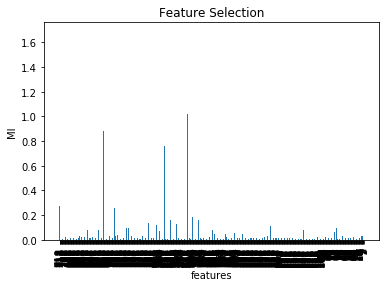

In [126]:
x = []
y = []
for i in range(len(MI_features)):
    y.append(MI_features[-i])
    x.append(len(MI_features)-i)
y = np.array(y)    
x = np.array(x)


position = np.arange(1,len(x)*2,2)
fig, ax = plt.subplots()

plt.bar(position, y)
plt.xlabel('features')
plt.ylabel('MI')
plt.title('Feature Selection')
plt.xticks(position, x, rotation='vertical')
plt.show()

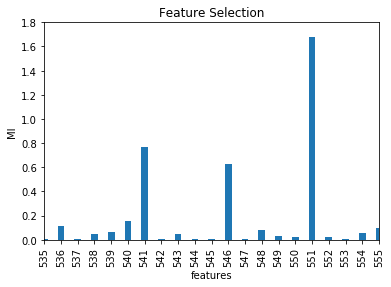

In [127]:
plt.bar(position, y)
plt.xlabel('features')
plt.ylabel('MI')
plt.title('Feature Selection')
plt.xticks(position, x, rotation='vertical')
plt.axis([x[350],x[390],0,1.8])
plt.show()


#### Training the data with NB:

In [128]:
from sklearn.naive_bayes import MultinomialNB

clf_clean_M = MultinomialNB()
clf_clean_M.fit(feature_clean[:, feature_highest_info], classesT_clean)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [129]:
from sklearn.naive_bayes import ComplementNB

clf_clean_C = ComplementNB()
clf_clean_C.fit(feature_clean[:, feature_highest_info], classesT_clean)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [130]:
from sklearn.naive_bayes import BernoulliNB

clf_clean_B = BernoulliNB()
clf_clean_B.fit(feature_clean[:, feature_highest_info], classesT_clean)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

#### Evaluation of the performance on the test set:

##### 1. Test set:

In [131]:
evalvectors_clean = vectorizer_clean.transform(Xe_clean).toarray()
evalvectors_clean = tfidf_transformer_clean.transform(evalvectors_clean)
print(evalvectors_clean.shape)     

# manually assigned labels to the testdata
le.fit(ye_clean)
classesE_clean = le.transform(ye_clean)

(53, 719)


##### 2. predicted data:

In [132]:
classesP_clean_M = clf_clean_M.predict(evalvectors_clean[:, feature_highest_info])

In [133]:
classesP_clean_C = clf_clean_C.predict(evalvectors_clean[:, feature_highest_info])

In [134]:
classesP_clean_B = clf_clean_B.predict(evalvectors_clean[:, feature_highest_info])

##### 3. Performance:

In [135]:
np.mean(classesP_clean_M == classesE_clean) # Multinomial

0.2830188679245283

In [136]:
np.mean(classesP_clean_C == classesE_clean) # Complement

0.5660377358490566

In [137]:
np.mean(classesP_clean_B == classesE_clean) # Bernoulli

0.5471698113207547

#### Metrics:

In [138]:
from sklearn import metrics
print("Classificatin Report MNB")
print(metrics.classification_report(classesP_clean_M, classesE_clean, target_names = list_of_classes_clean ))
print(" ")
print("Classificatin Report CNB")
print(metrics.classification_report(classesP_clean_C, classesE_clean, target_names = list_of_classes_clean ))
print(" ")
print("Classificatin Report Bernoulli")
print(metrics.classification_report(classesP_clean_B, classesE_clean, target_names = list_of_classes_clean ))
print(" ")

Classificatin Report MNB
                  precision    recall  f1-score   support

         finance       0.00      0.00      0.00         0
          income       0.00      0.00      0.00         0
         leisure       1.00      0.28      0.44        53
          living       0.00      0.00      0.00         0
         private       0.00      0.00      0.00         0
standardOfLiving       0.00      0.00      0.00         0

       micro avg       0.28      0.28      0.28        53
       macro avg       0.17      0.05      0.07        53
    weighted avg       1.00      0.28      0.44        53

 
Classificatin Report CNB
                  precision    recall  f1-score   support

         finance       0.22      1.00      0.36         2
          income       0.00      0.00      0.00         0
         leisure       0.93      0.50      0.65        28
          living       0.38      1.00      0.55         3
         private       0.17      1.00      0.29         1
standardOfLiving

C:\Users\Overlord\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [139]:
print("Confusion Matrix MNB")
print(metrics.confusion_matrix(classesE_clean, classesP_clean_M))
print(" ")
print("Confusion Matrix CNB")
print(metrics.confusion_matrix(classesE_clean, classesP_clean_C))
print(" ")
print("Confusion Matrix Bernoulli")
print(metrics.confusion_matrix(classesE_clean, classesP_clean_B))
print(" ")

Confusion Matrix MNB
[[ 0  0  9  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0 15  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0 12  0  0  0]]
 
Confusion Matrix CNB
[[ 2  0  2  0  0  5]
 [ 0  0  0  0  0  3]
 [ 0  0 14  0  0  1]
 [ 0  0  5  3  0  0]
 [ 0  0  5  0  1  0]
 [ 0  0  2  0  0 10]]
 
Confusion Matrix Bernoulli
[[ 2  0  2  0  0  5]
 [ 0  0  0  0  0  3]
 [ 0  0 14  0  0  1]
 [ 0  0  5  3  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  2  0  0 10]]
 


### Naive Bayes Classification with manually selected features

In this section we do the NB Classification as in the previous section, but rather to use a scikit-method for feature selection, we manually choose one of the given attributes as our feature. In our case it is the 6th attribute in the data set called "Verwendungszweck". The selection of the feature is based on empirical results and intuition, since you can easily extract from the given dataset that the Column "Verwendungszweck" contains the most characteristic information for a class.    

At first we have to extract our given textdata from the _.csv_ file:  

In [140]:
import numpy as np

attributes = np.array(["ID","Auftragskonto","Buchungstag","Valutadatum","Buchungstext","Verwendungszweck","Beguenstigter/Zahlungspflichtiger","Kontonummer","BLZ","Betrag","Waehrung","label"])
len(attributes)

12

In [141]:
# Load CSV (using python)
import csv

filename = 'Exercise1_TransactionClassification_DataSet_w_Header.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=';', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype("str")

In [142]:
data.shape

(209, 12)

In [143]:
import string
import csv

data

#cleaning up the data as in the previous section
table = str.maketrans('', '', string.punctuation)
for (x,y), value in np.ndenumerate(data):
    
    c=np.array(list(filter(None,[w.translate(table) for w in data[x,y].split()])),'<U120')
    data[x,y]=" ".join(c).lower() 
    
print(data.shape)
print(data)   

(209, 12)
[['0' '899902010' '28072016' ... '200000' 'eur' 'income']
 ['1' '899902010' '27072016' ... '67000' 'eur' 'living']
 ['2' '899902010' '21072016' ... '7000' 'eur' 'private']
 ...
 ['206' '' '28012016' ... '200000' 'eur' 'income']
 ['207' '' '28012016' ... '400000' 'eur' 'finance']
 ['208' '899902100' '08012016' ... '512' 'eur' 'leisure']]


#### Train/Test-Split of the data:

##### 1. Train/Test-Split - 70/30:

In [144]:
from sklearn.model_selection import train_test_split
X, y = data[:,:-1], data[:,-1]
row_len, col_len = X.shape

Xt, Xe, yt, ye = train_test_split(X, y, test_size=0.3) # splitting data using random choice

row_lenT, col_lenT = Xt.shape
print("Training Data:")
print(row_lenT, col_lenT)
print(Xt)

print(" ")

row_lenE, col_lenE = Xe.shape
print("Test-Data:")
print(row_lenE, col_lenE)
print(Xe)


Training Data:
146 11
[['153' '899902100' '25012016' ... 'csdbde71xxx' '50' 'eur']
 ['180' '' '31052016' ... 'vohade2hxxx' '25000' 'eur']
 ['52' '899902100' '11042016' ... 'essede5f' '4403' 'eur']
 ...
 ['59' '899902100' '05042016' ... '76030080' '243' 'eur']
 ['196' '' '16032016' ... 'vohade2hxxx' '100000' 'eur']
 ['90' '899902100' '07032016' ... 'byladem1tst' '18' 'eur']]
 
Test-Data:
63 11
[['98' '899902100' '01032016' '01032016'
  'lastschrift einzugsermã¤chtigung'
  'visa62185021amazonde 754eur00000000000 2602 000 10355969' 'amazon eu'
  '922904916' '76030080' '754' 'eur']
 ['62' '899902100' '01042016' '01042016'
  'lastschrift einzugsermã¤chtigung'
  'visa621850218002796620 1299eur00000000000 3003 000 10355942'
  'amazon de marketplace' '922904916' '76030080' '1299' 'eur']
 ['39' '899902010' '02032016' '02032016' 'geldanlage'
  'ccbade31xxx de71310108339900123456 sparen endtoendref notprovided dauerauftrag dauerauftrag'
  'michael koffer' 'de69790800529736000780' 'dresdeff790' '3

#### Preparing the data for machine learning methods:

In case to be able to apply any kind of machine learning methods to our data, we first of all must tokenize the text in our data. Afterwards the tokenized text needs to be encoded as integers or floating point values. For this process we will discuss  some methods from _scikit-learn_:

##### 1. CountVectorizer:

The CountVectorizer does text preprocessing, tokenizing and filtering of stopwords. Thus it creates a vocabulary of known words which can be used for encoding the given data set. An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document._(Pedregosa et al. 2011)_

In [145]:
## not cleaned text 

from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = np.reshape(Xt,(1,col_lenT*row_lenT))
text = np.squeeze(text, axis=0)
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# encode document
featurevectors = []
for i in range(0, len(Xt[:])):
    featurevector = vectorizer.transform([Xt[i,5]]).toarray() #feature selection -Buchungstext-
    featurevectors.append(featurevector) 
    
featurevectors = np.array(featurevectors)
featurevectors = np.squeeze(featurevectors, axis=1)
featurevectors.shape


(146, 734)

##### 2. TfidfTransformer:

One issue with simple counts is that some words like “the” will appear many times and their large counts will not be very meaningful in the encoded vectors. An alternative is to calculate word frequencies, and by far the most popular method is called __TF-IDF-Transformer__.

In [146]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
featurevectors = tfidf_transformer.fit_transform(featurevectors)
featurevectors.shape

(146, 734)

##### 3. Encoding the labels to integers:

In [147]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(yt)
print(list(le.classes_))
classesT = le.transform(yt)
print(classesT)

['finance', 'income', 'leisure', 'living', 'private', 'standardofliving']
[4 0 5 0 4 5 2 5 3 4 5 2 2 2 2 3 2 2 2 2 3 3 4 5 5 4 0 5 0 0 0 2 0 3 5 5 5
 0 4 5 2 1 5 5 1 3 3 5 2 5 0 0 3 4 1 3 1 2 5 0 4 3 5 2 5 5 1 5 3 0 3 5 3 2
 4 2 5 0 2 0 1 5 2 2 2 2 2 2 3 4 0 4 2 4 1 2 5 2 2 3 2 2 0 2 2 0 4 5 2 5 0
 3 3 2 3 5 3 2 2 2 4 2 5 5 4 5 0 5 5 1 5 2 2 2 0 0 2 3 4 5 4 2 2 2 0 2]


#### Training the data with NB:

In [148]:
from sklearn.naive_bayes import MultinomialNB
clf_M = MultinomialNB()
clf_M.fit(featurevectors, classesT)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [149]:
from sklearn.naive_bayes import ComplementNB
clf_C = ComplementNB()
clf_C.fit(featurevectors, classesT)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [150]:
from sklearn.naive_bayes import BernoulliNB
clf_B = BernoulliNB()
clf_B.fit(featurevectors, classesT)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

#### Evaluation of the performance on the test set:

##### 1. Test set:

In [151]:
# preparing the testdata for the prediction modelling
evalvectors = []
for i in range(0, len(Xe[:])):
    evalvector = vectorizer.transform([Xe[i,5]]).toarray() #feature selection -Buchungstext-
    evalvectors.append(evalvector)
    
evalvectors = np.array(evalvectors)
evalvectors = np.squeeze(evalvectors, axis=1)

evalvectors = tfidf_transformer.transform(evalvectors)

print(evalvectors.shape)    

# manually assigned labels to the testdata
le.fit(ye)
classesE = le.transform(ye)

(63, 734)


##### 2. predicted data:

In [152]:
classesP_M = clf_M.predict(evalvectors)

In [153]:
classesP_C = clf_C.predict(evalvectors)

In [154]:
classesP_B = clf_B.predict(evalvectors)

##### 3. Performance:

In [155]:
np.mean(classesP_M == classesE)

0.8888888888888888

In [156]:
np.mean(classesP_C == classesE)

0.9206349206349206

In [157]:
np.mean(classesP_B == classesE)

0.6825396825396826

#### Evaluation Metrics:

Since we are dealing with a Multi-Class-Text classification there are two evaluation metrics to be considered the micro- and the macro average.

In [158]:
from sklearn import metrics
print("Classificatin Report MNB")
print(metrics.classification_report(classesP_M, classesE, target_names = list(le.classes_)))
print(" ")
print("Classificatin Report CNB")
print(metrics.classification_report(classesP_C, classesE, target_names = list(le.classes_)))
print(" ")
print("Classificatin Report Bernoulli")
print(metrics.classification_report(classesP_B, classesE, target_names = list(le.classes_)))
print(" ")

Classificatin Report MNB
                  precision    recall  f1-score   support

         finance       1.00      1.00      1.00        11
          income       1.00      1.00      1.00         9
         leisure       1.00      0.77      0.87        26
          living       0.67      1.00      0.80         4
         private       0.25      1.00      0.40         1
standardofliving       0.85      0.92      0.88        12

       micro avg       0.89      0.89      0.89        63
       macro avg       0.79      0.95      0.82        63
    weighted avg       0.94      0.89      0.90        63

 
Classificatin Report CNB
                  precision    recall  f1-score   support

         finance       1.00      0.79      0.88        14
          income       1.00      1.00      1.00         9
         leisure       0.95      1.00      0.97        19
          living       0.67      1.00      0.80         4
         private       0.75      1.00      0.86         3
standardofliving

C:\Users\Overlord\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [159]:
print("Confussion Matrix MNB")
print(metrics.confusion_matrix(classesE, classesP_M))
print(" ")
print("Confussion Matrix MNB")
print(metrics.confusion_matrix(classesE, classesP_C))
print(" ")
print("Confussion Matrix MNB")
print(metrics.confusion_matrix(classesE, classesP_B))
print(" ")


Confussion Matrix MNB
[[11  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 20  0  0  0]
 [ 0  0  1  4  0  1]
 [ 0  0  3  0  1  0]
 [ 0  0  2  0  0 11]]
 
Confussion Matrix MNB
[[11  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 19  0  0  1]
 [ 1  0  0  4  0  1]
 [ 1  0  0  0  3  0]
 [ 1  0  0  0  0 12]]
 
Confussion Matrix MNB
[[11  0  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0 20  0  0  0]
 [ 0  0  5  1  0  0]
 [ 0  0  3  0  1  0]
 [ 0  0  3  0  0 10]]
 


### Conclusion

It seems that the CNB in general performs better than MNB as expected. Whereas the Bernoulli model shows good performance in the first section where the feature selection is based on their mutual information and bad performance where we manually have chosen the feature "Verwendungszweck". An explanation for the bad performance of the Bernoulli model leads back to its methodology. The Bernoulli uses binary occurrence information, ignoring the number of occurrences, which is one indicator, that can lead to bad performance. For example, it may assign an transaction just because of the appearance of a specific word in the selected feature. Since the feature we have selected usually contains more than just one word not every word must have a high mutual information value or must be of great importance which in the MultinomialNB is weighted based on the relative frequency of the word/term occuring in the class. Ignoring this information can lead the Bernoulli Model to bad predictions, since it weights some terms more than needed. Otherwise it could perform very well if all the terms/words/features were chosen throughout a feature selection method, as seen in the first section, where we have chosen the feature based on MI-value.    

Another important thing to mention, is that the performance with the manually chosen feature performs much better than the one with a feature selection method from scikit-learn. Regarding this I am not really sure, whether the second classification method is an issue of overfitting and the first one a more generalized one. However MI is a greedy method, which means it may select features that contribute no incremental information over previously selected features. In other words, in the first 20 selected features there maybe some of them to be redundant and such redundancy can negatively impact accuracy._(Manning et al. 2010)_. We can now come to a final conclusion that CNB seems to perform very stable as a Naive Bayes classifier and maybe a manual selection of features at small data sets is more recommended for better performance results.

As a last resort to mention, the naive bayes classifier based on its precondition of independency between its features may not be the best choise as classifier but regarding the computational cost one of the cheapest.

### References

Manning, Christopher and Raghavan, Prabhakar and Schütze, and Hinrich. 2010. Introduction to Information Retrieval. Vol. 16. Cambridge university press.

Rennie, Jason D and Shih, Lawrence and Teevan, Jaime and Karger, and David R. 2003. “Tackling the Poor Assumptions of Naive Bayes Text Classifiers,” Proceedings of the 20th international conference on machine learning (ICML-03),.

Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V. and Thirion, B. and Grisel, O. and Blondel, et al. 2011. “Scikit-Learn: Machine Learning in {P}ython,” Journal of Machine Learning Research, 12.


Bronshtein, Adi. 2017. “Train/Test Split and Cross Validation in Python.” Train/Test Split and Cross Validation in Python. https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6.

Jason Brownlee. 2018. “How To Load Machine Learning Data in Python.” How To Load Machine Learning Data in Python. https://machinelearningmastery.com/load-machine-learning-data-python/.